# EDA

In [1]:
import sys
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.abspath('../source'))

from connection_mysql import get_sqlalchemy_engine

conexion = get_sqlalchemy_engine()

✅ Conexión a la base de datos exitosa.


In [4]:
df = pd.read_sql_query("SELECT * FROM raw_candidates", conexion)
print(df.head())

   id  first_name   last_name                      email  country  \
0   1  Bernadette   Langworth        leonard91@yahoo.com   Norway   
1   2      Camryn    Reynolds        zelda56@hotmail.com   Panama   
2   3       Larue      Spinka   okey_schultz41@gmail.com  Belarus   
3   4        Arch      Spinka     elvera_kulas@yahoo.com  Eritrea   
4   5       Larue  Altenwerth  minnie.gislason@gmail.com  Myanmar   

  application_date  yoe  seniority                         technology  \
0       2021-02-26    2     Intern                      Data Engineer   
1       2021-09-09   10     Intern                      Data Engineer   
2       2020-04-14    4  Mid-Level                     Client Success   
3       2020-10-01   25    Trainee                          QA Manual   
4       2020-05-20   13  Mid-Level  Social Media Community Management   

   code_challenge_score  technical_interview_score  
0                   3.0                        3.0  
1                   2.0                 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         50000 non-null  int64  
 1   first_name                 50000 non-null  object 
 2   last_name                  50000 non-null  object 
 3   email                      50000 non-null  object 
 4   country                    50000 non-null  object 
 5   application_date           50000 non-null  object 
 6   yoe                        50000 non-null  int64  
 7   seniority                  50000 non-null  object 
 8   technology                 50000 non-null  object 
 9   code_challenge_score       50000 non-null  float64
 10  technical_interview_score  50000 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.2+ MB


In [6]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 id                           0
first_name                   0
last_name                    0
email                        0
country                      0
application_date             0
yoe                          0
seniority                    0
technology                   0
code_challenge_score         0
technical_interview_score    0
dtype: int64


In [10]:
duplicate_values= df[df.duplicated(keep=False)]
print("Datos duplicados:\n", duplicate_values)

Datos duplicados:
 Empty DataFrame
Columns: [id, first_name, last_name, email, country, application_date, yoe, seniority, technology, code_challenge_score, technical_interview_score]
Index: []


In [24]:
for col in df.columns:
    print(f"Valores duplicados en '{col}':")
    print(df[col].value_counts()[df[col].value_counts() > 1])
    print("-" * 40)

Valores duplicados en 'id':
Series([], Name: count, dtype: int64)
----------------------------------------
Valores duplicados en 'first_name':
first_name
Sarai        33
Elyse        32
Anabel       31
Eva          31
Nayeli       30
             ..
Janis         6
Jaydon        6
Paul          5
Antonetta     5
Gudrun        5
Name: count, Length: 3007, dtype: int64
----------------------------------------
Valores duplicados en 'last_name':
last_name
Murazik       138
Nitzsche      134
Harvey        133
Metz          133
Lang          133
             ... 
Rutherford     83
Howe           82
White          79
McClure        78
Bechtelar      76
Name: count, Length: 474, dtype: int64
----------------------------------------
Valores duplicados en 'email':
email
marianne31@yahoo.com        3
fern70@gmail.com            3
isaiah24@yahoo.com          2
missouri65@yahoo.com        2
kelton91@hotmail.com        2
                           ..
marjolaine91@hotmail.com    2
jazmin54@gmail.com 

In [17]:
duplicated_personal_data= df[df.duplicated(subset=['email', 'first_name', 'last_name'], keep=False)]
print("Datos Personales Duplicados:\n", duplicated_personal_data)

Datos Personales Duplicados:
 Empty DataFrame
Columns: [id, first_name, last_name, email, country, application_date, yoe, seniority, technology, code_challenge_score, technical_interview_score]
Index: []


In [25]:
duplicated_emails = df[df.duplicated(subset=['email'], keep=False)]
print(duplicated_emails)


          id first_name   last_name                    email  \
37        38     Grayce       Boyer      matilda17@gmail.com   
42        43      River      Erdman      dewayne50@gmail.com   
385      386     Kailee  Konopelski       sandra83@gmail.com   
455      456    Clemmie     Gleason         kadin0@gmail.com   
469      470      Lelia      Nienow      ilene47@hotmail.com   
...      ...        ...         ...                      ...   
49236  49237     Katlyn       Moore      stephen39@yahoo.com   
49819  49820     Kaylin       Hills  alejandra17@hotmail.com   
49828  49829    Mozelle   O'Connell      fiona72@hotmail.com   
49905  49906       Mark      Rippin     callie59@hotmail.com   
49912  49913  Anastasia       Zieme       esteban3@yahoo.com   

                      country application_date  yoe  seniority  \
37                     Taiwan       2019-01-07   27     Intern   
42     Bosnia and Herzegovina       2019-12-02    4       Lead   
385              Cook Islands    

In [26]:
df.describe()


,id,yoe,code_challenge_score,technical_interview_score
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,15.286980,4.996400,5.003880
std,14433.901067,8.830652,3.166896,3.165082
min,1.000000,0.000000,0.000000,0.000000
25%,12500.750000,8.000000,2.000000,2.000000
50%,25000.500000,15.000000,5.000000,5.000000
75%,37500.250000,23.000000,8.000000,8.000000
max,50000.000000,30.000000,10.000000,10.000000


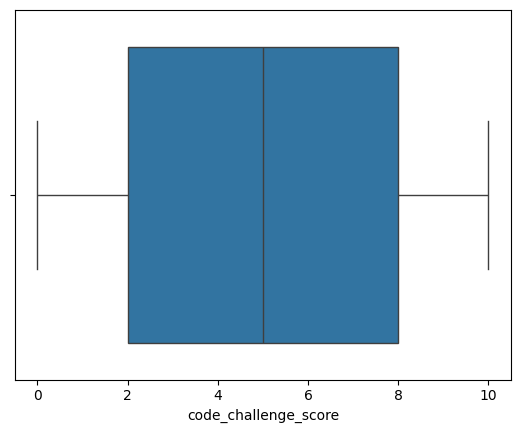

In [27]:


sns.boxplot(x=df['code_challenge_score'])
plt.show()


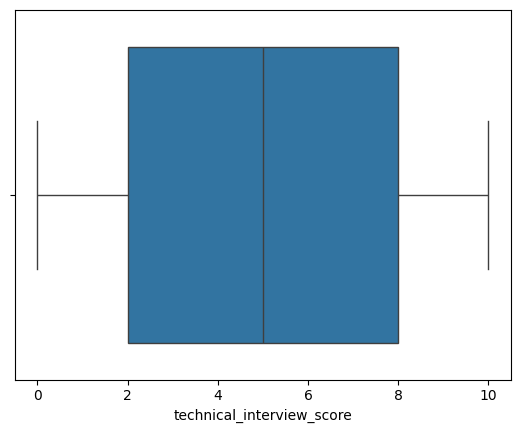

In [ ]:

sns.boxplot(x=df['technical_interview_score'])
plt.show()


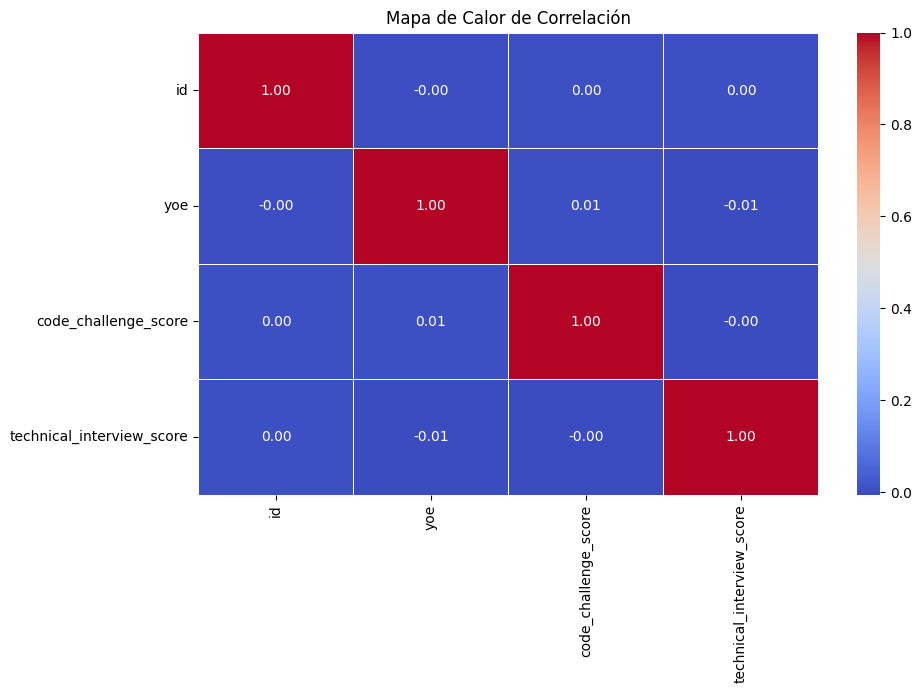

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()


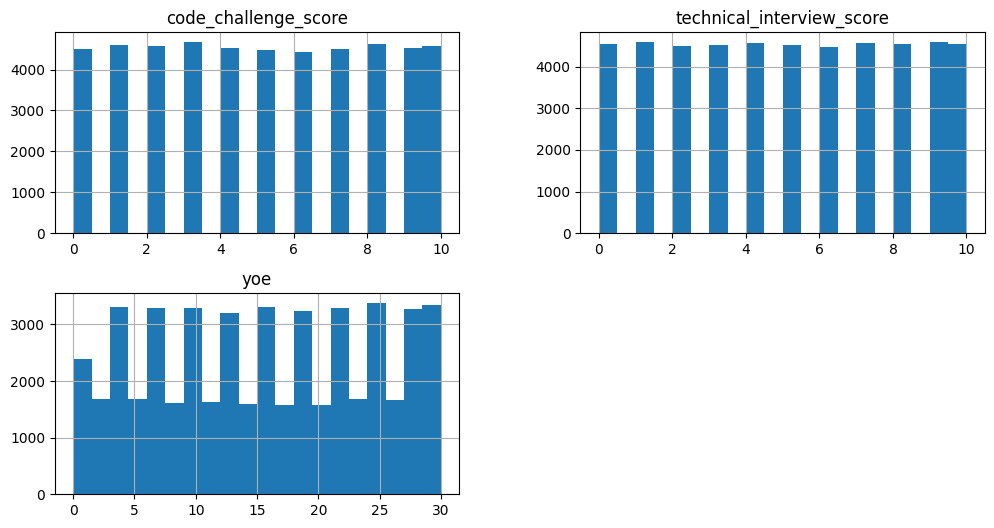

In [31]:
# Histograma de los puntajes
df[['code_challenge_score', 'technical_interview_score', 'yoe']].hist(figsize=(12, 6), bins=20)
plt.show()

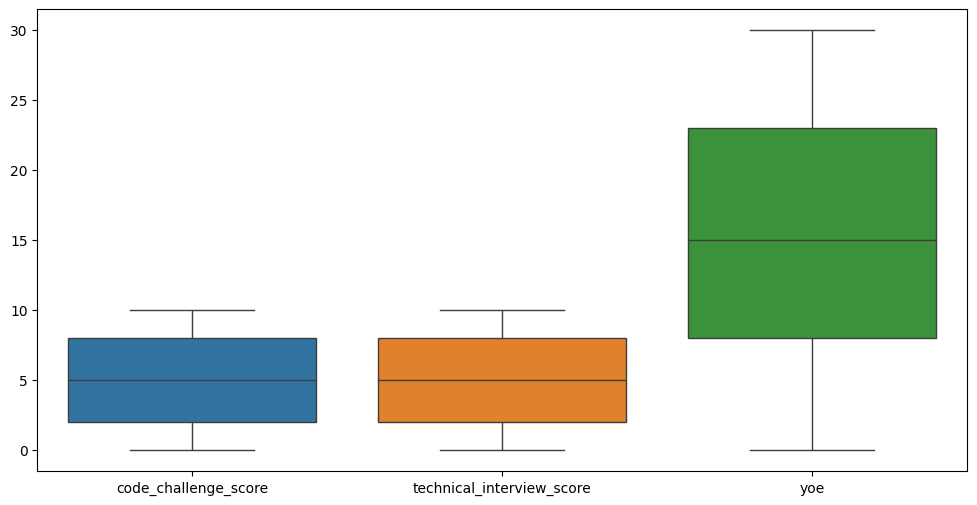

In [32]:
# Boxplot para detectar valores atípicos en los puntajes y experiencia
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['code_challenge_score', 'technical_interview_score', 'yoe']])
plt.show()


In [44]:
# Definir una máscara booleana para los candidatos contratados
hired= (df["code_challenge_score"] >= 7) & (df["technical_interview_score"] >= 7)

# Obtener conteo de contratados y no contratados sin modificar el DataFrame
hired_count = hired.sum()
not_hired_count = (~hired).sum()

print("Empleados contratados:\n", hired_count)
print("Empleados no contratados:\n", not_hired_count)

Empleados contratados:
 6698
Empleados no contratados:
 43302


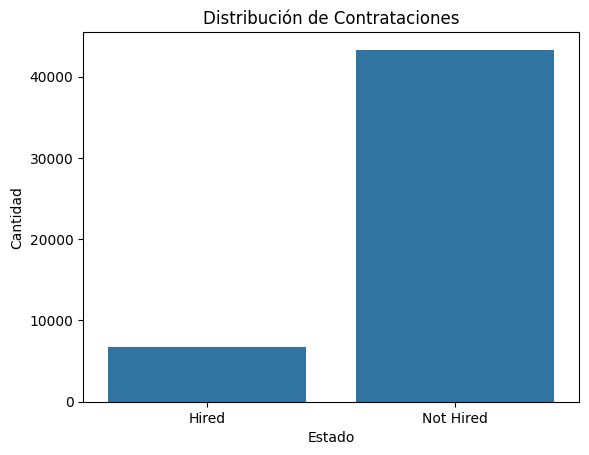

In [42]:
sns.barplot(x=["Hired", "Not Hired"], y=[hired_count, not_hired_count])
plt.title("Distribución de Contrataciones")
plt.xlabel("Estado")
plt.ylabel("Cantidad")
plt.show()

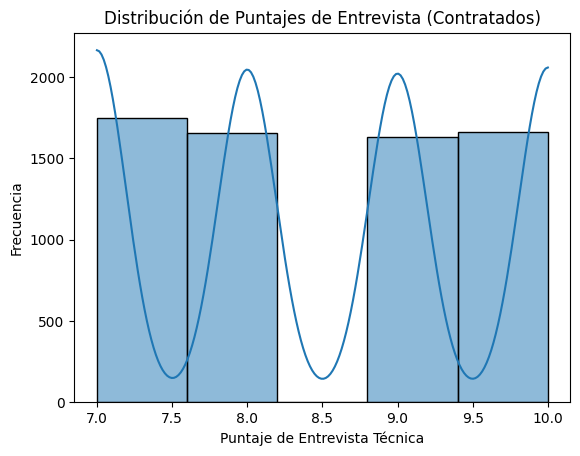

In [45]:
sns.histplot(df[hired]["technical_interview_score"], bins=5, kde=True)
plt.title("Distribución de Puntajes de Entrevista (Contratados)")
plt.xlabel("Puntaje de Entrevista Técnica")
plt.ylabel("Frecuencia")
plt.show()

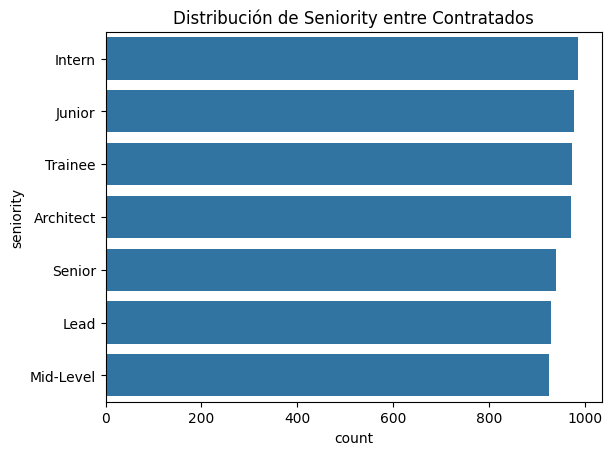

In [55]:
# Contar contratados por nivel de seniority
seniority_counts = df[hired]["seniority"].value_counts()
# Visualizar cuántos candidatos hay por nivel de seniority entre los contratados
sns.countplot(data=df[hired], y="seniority", order=seniority_counts.index)
plt.title("Distribución de Seniority entre Contratados")
plt.show()




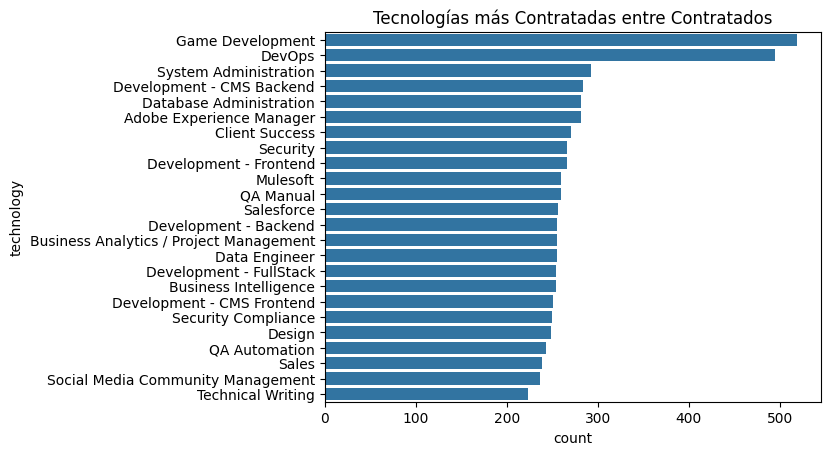

In [56]:
# Contar contratados por tecnología
technology_counts = df[hired]["technology"].value_counts()
# Tecnologías más comunes entre contratados
sns.countplot(data=df[hired], y="technology", order=technology_counts.index)
plt.title("Tecnologías más Contratadas entre Contratados")
plt.show()

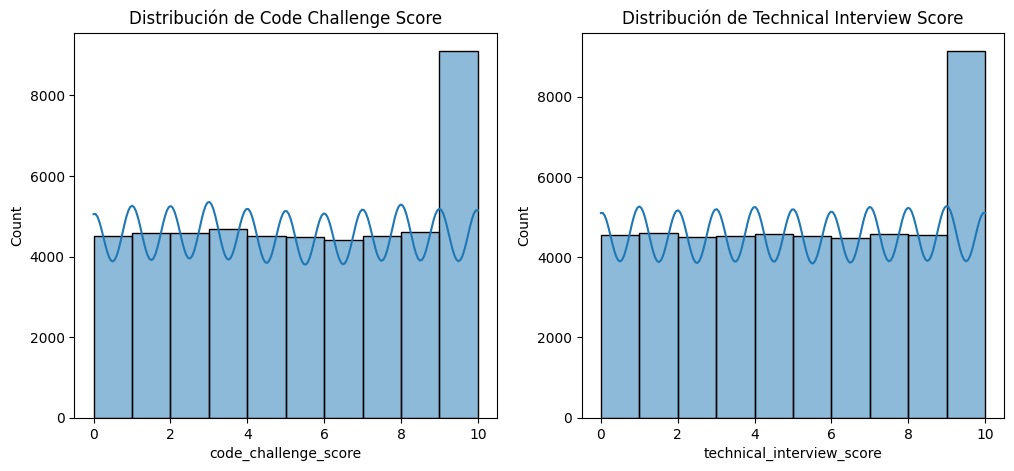

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["code_challenge_score"], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Code Challenge Score")

sns.histplot(df["technical_interview_score"], bins=10, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Technical Interview Score")

plt.show()


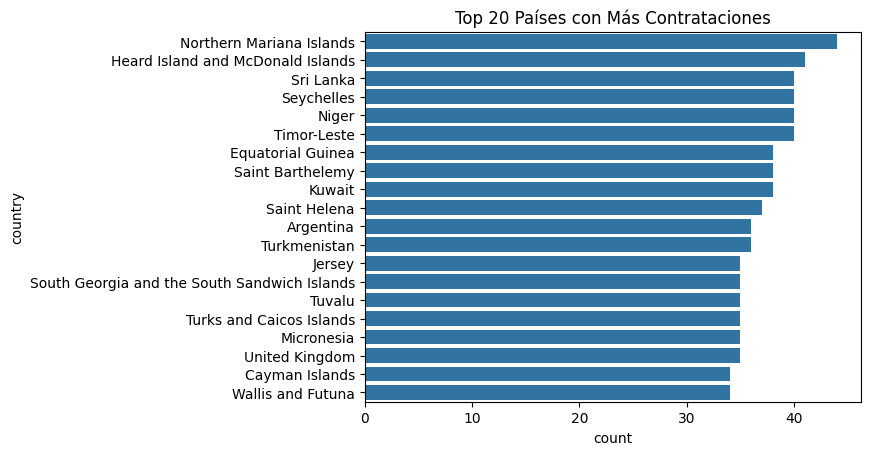

In [61]:
# Conteo de contrataciones por país
hired_by_country = df[hired]["country"].value_counts().head(20)

sns.countplot(data=df[hired], y="country", order=hired_by_country.index)
plt.title("Top 20 Países con Más Contrataciones")
plt.show()


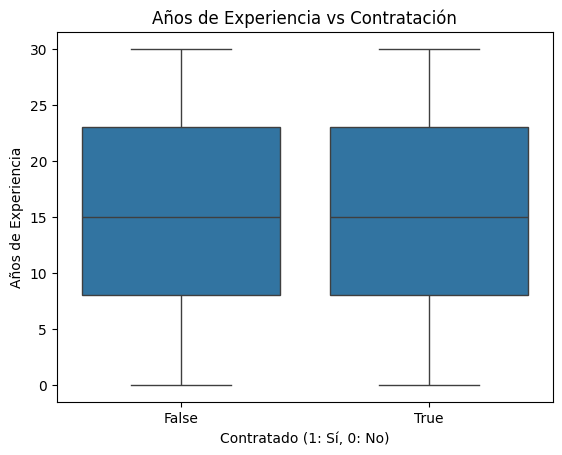

In [62]:
sns.boxplot(data=df, x=hired, y="yoe")
plt.title("Años de Experiencia vs Contratación")
plt.xlabel("Contratado (1: Sí, 0: No)")
plt.ylabel("Años de Experiencia")
plt.show()


In [ ]:
df["application_year"] = pd.to_datetime(df["application_date"]).dt.year

# Conteo de contrataciones por año
hired_by_year = df[hired]["application_year"].value_counts().sort_index()

print("Contrataciones por año:")
print(hired_by_year)


Contrataciones por año:
application_year
2018    1409
2019    1524
2020    1485
2021    1485
2022     795
Name: count, dtype: int64
